# Point Intro to TF

#### Load dependencies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt
import pandas as pd

#### Create a small data set 

In [2]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels (dependent variable)

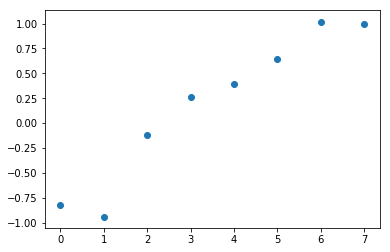

In [3]:
fig, ax = plt.subplots()
_ = ax.scatter(xs,ys)

#### Define Variables

In [4]:
m = tf.Variable(-.5)
b = tf.Variable(2.)

#### Define cost function

In [5]:
total_error = 0


for x,y in zip(xs,ys):
    y_model = m*x +b
    total_error += (y-y_model)**2

####  Define optimizer

In [6]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(total_error)

#### Define initializer

In [7]:
initializer_op = tf.global_variables_initializer()

####  Execute session

In [18]:
with tf.Session() as session:
    session.run(initializer_op)
    
    n_epochs = 1000
    for i in range(n_epochs):
        session.run(optimizer_op)
        
    slope, intercept = session.run([m,b])

In [19]:
print ( slope, intercept)

0.291226 -0.83232


In [20]:
y_hat = intercept + slope*np.array(xs)

In [21]:
pd.DataFrame(list(zip(ys,y_hat)), columns=['y','y_hat'])

,y,y_hat
0,-0.82,-0.832320
1,-0.94,-0.541094
2,-0.12,-0.249869
3,0.26,0.041357
4,0.39,0.332582
5,0.64,0.623808
6,1.02,0.915034
7,1.00,1.206259


-0.359856630824 7.35985663082


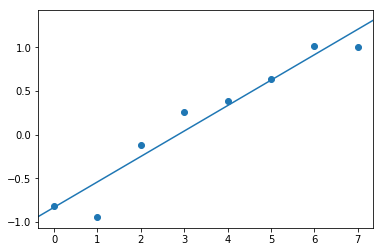

In [22]:
fig , ax = plt.subplots()

ax.scatter(xs,ys)
x_min, x_max = ax.get_xlim()
y_min,y_max =( intercept+slope*x_min, intercept + slope*x_max)

ax.plot([x_min, x_max],[y_min, y_max])
_ = ax.set_xlim([x_min, x_max])

print(x_min, x_max)